In [1]:
import numpy as np
import pandas as pd # data frame
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization

plt.style.use('seaborn')

import missingno as msno # null data를 보여줌

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data = pd.read_csv('../input/titanic/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# checking for total null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, Cabin, Embarked에 null이 존재한다. 이를 채워주어야한다.

## 생존자는 얼마나 있을까?

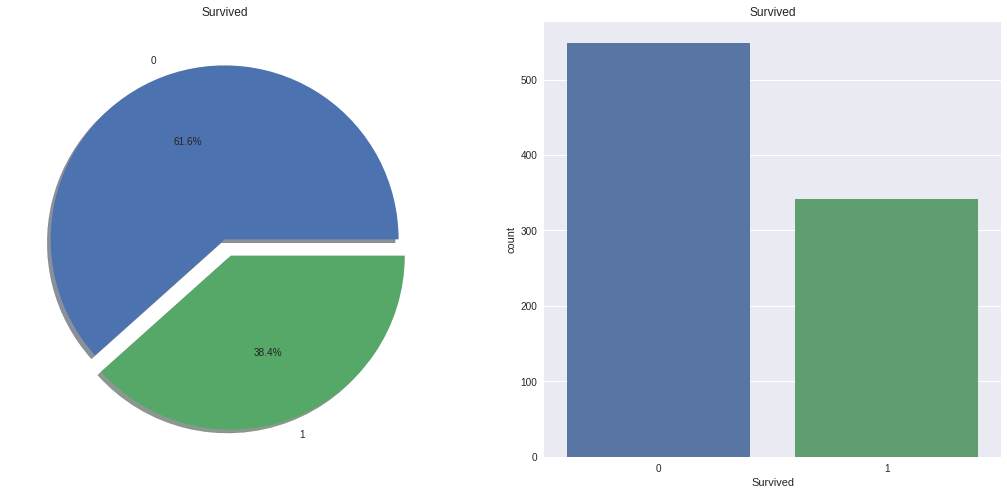

In [5]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [6]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

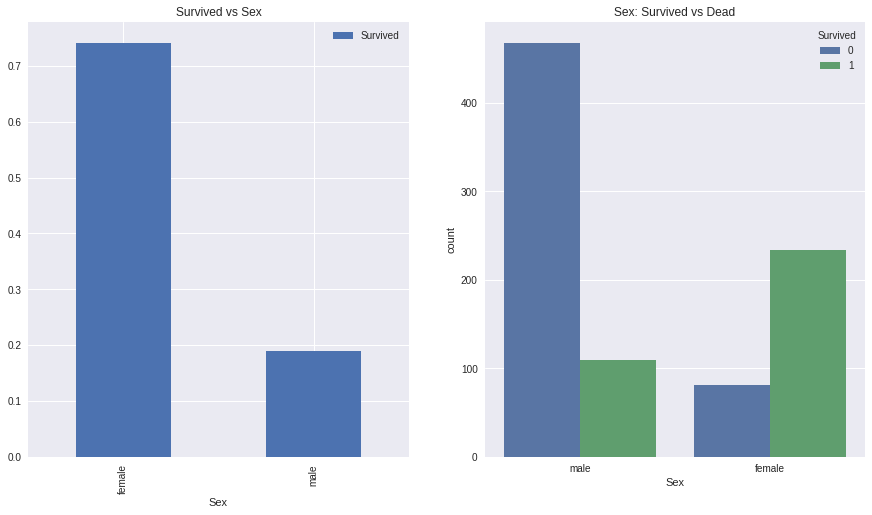

In [7]:
# 남,여간 생존률 차이.
# 여성이 더 많이 생존한 것을 볼 수 있다.
f, ax = plt.subplots(1, 2, figsize=(15, 8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [8]:
# pd.crosstab을 통해 숫자, 색깔로 볼 수 있다.
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


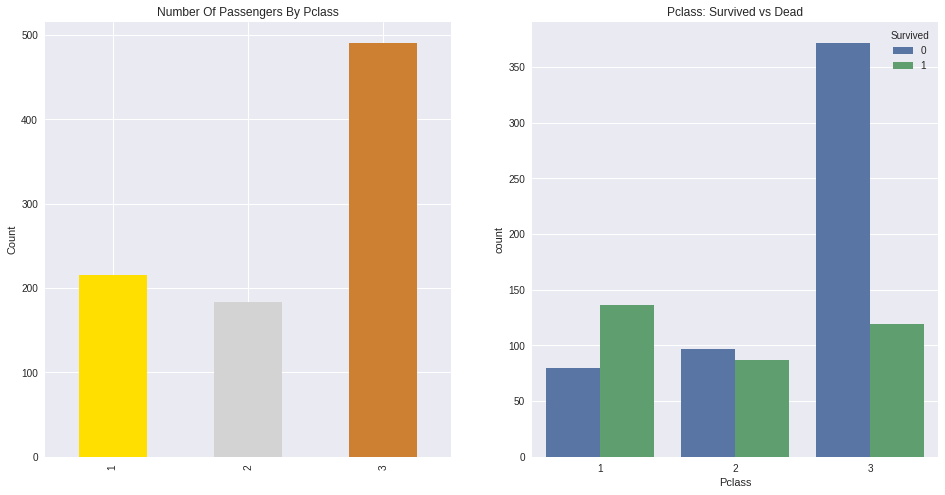

In [9]:
# pclass(1등석, 2등석, 3등석)별 생존률 확인
# 좋은 좌석일수록 생존률이 높다.
f, ax = plt.subplots(1, 2, figsize=(16, 8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

In [10]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

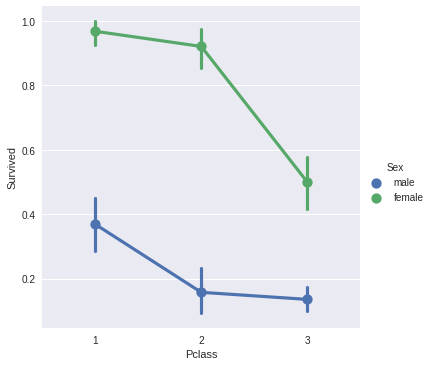

In [11]:
# factorplot을 통해 꺾은선 그래프 형태로 값을 같이 확인할 수 있다.
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

In [12]:
print(f"Oldest Passenger was of: {data['Age'].max()} Years")
print(f"Youngest Passenger was of: {data['Age'].min()} Years")
print(f"Average Age on the ship: {data['Age'].mean()} Years")

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


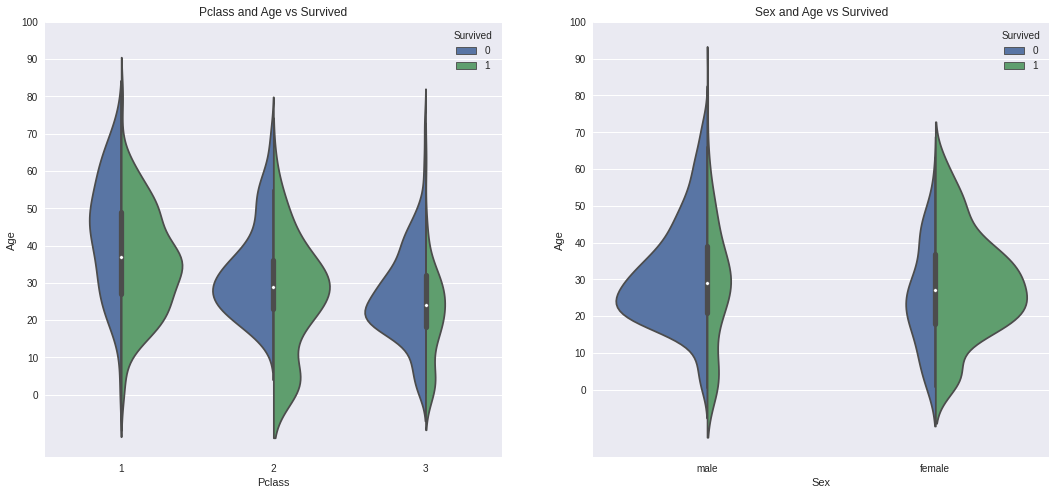

In [13]:
# violinplot을 통해 Pclass, Sex별 생존률을 나이대별로 시각화할 수 있다.
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=data, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot('Sex', 'Age', hue='Survived', data=data, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

In [14]:
# 이름 중 'xxx.'인 부분을 추출한다 (ex: Ms. Mrs. Mr. 등등...)
# 호칭을 추출하는 것으로 생각하면 된다.
data['Initial'] = 0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

In [15]:
# checking the Initials with the Sex
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [16]:
# 위의 결과에 맞게 호칭들을 정리해준다. (Master, Miss, Mr, Mrs, Other)다섯가지만 사용해서 구분할 것이다.
data['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don'],
                        ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr'], inplace=True)

In [17]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [18]:
# null값들은 각 호칭별 나이의 평균으로 넣어준다.
data.loc[(data.Age.isnull()) & (data.Initial=='Mr'),'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Initial=='Mrs'),'Age'] = 36
data.loc[(data.Age.isnull()) & (data.Initial=='Master'),'Age'] = 5
data.loc[(data.Age.isnull()) & (data.Initial=='Miss'),'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Initial=='Other'),'Age'] = 46

In [19]:
# null값이 채워진 것을 볼 수 있다.
data.Age.isnull().any()

False

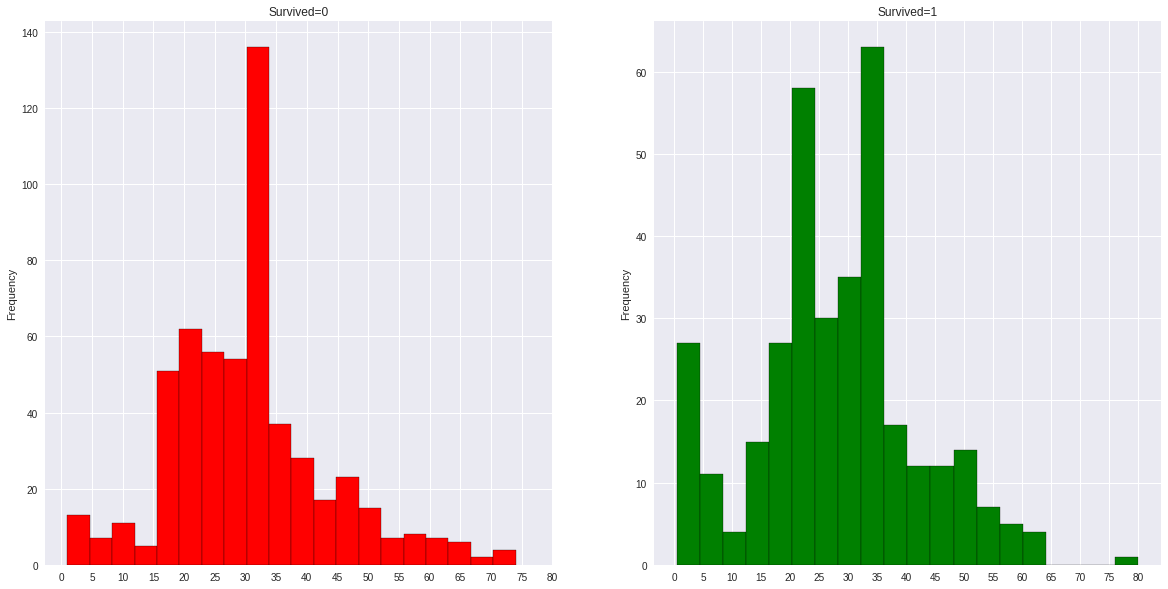

In [20]:
# 나이대별 생존률을 더 자세히 시각화 해보았다. histogram형식으로 표현.
f, ax = plt.subplots(1, 2, figsize=(20, 10))
data[data['Survived'] == 0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived=0')
x1=list(range(0, 85, 5))
ax[0].set_xticks(x1)

data[data['Survived'] == 1].Age.plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')
ax[1].set_title('Survived=1')
x2=list(range(0, 85, 5))
ax[1].set_xticks(x2)

plt.show()

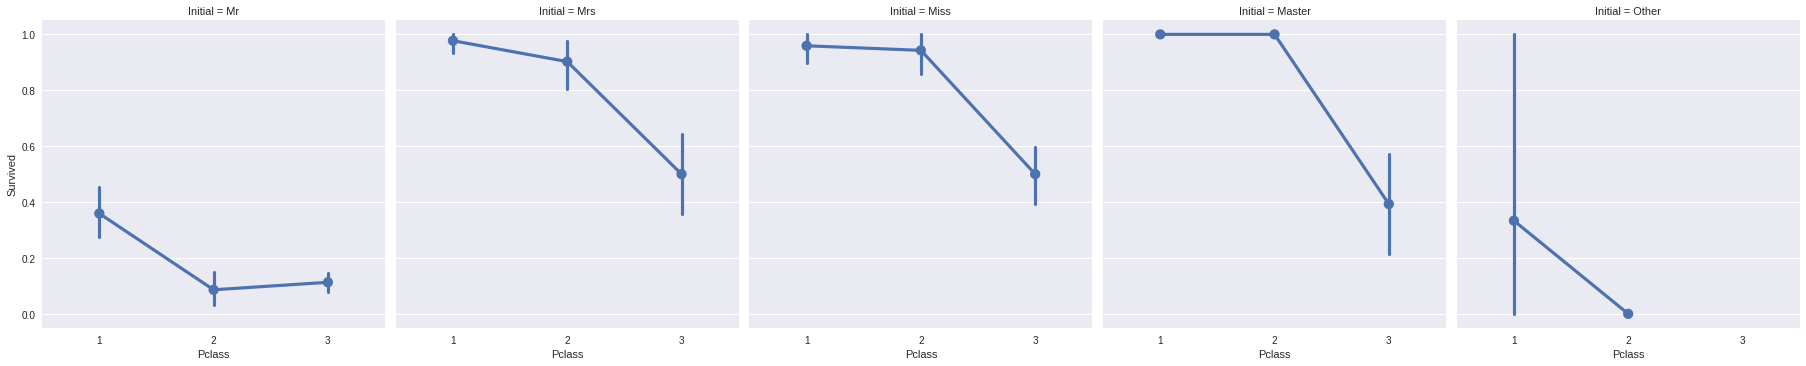

In [21]:
# Initial, Pclass별 생존률을 확인.
# Mrs, Miss (이상 여성), Master의 생존률이 대체로 높은 것을 볼 수 있다.
# 역시나 Pclass가 높을 수록 생존률이 높다.
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)
plt.show()

In [22]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

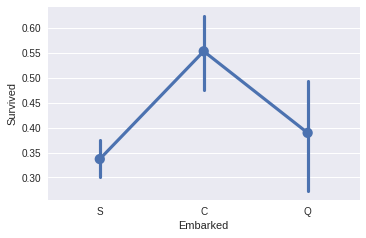

In [23]:
# Embarked(탑승 항구)별로 생존률 확인
sns.factorplot('Embarked', 'Survived', data=data)
f = plt.gcf()
f.set_size_inches(5, 3)
plt.show()

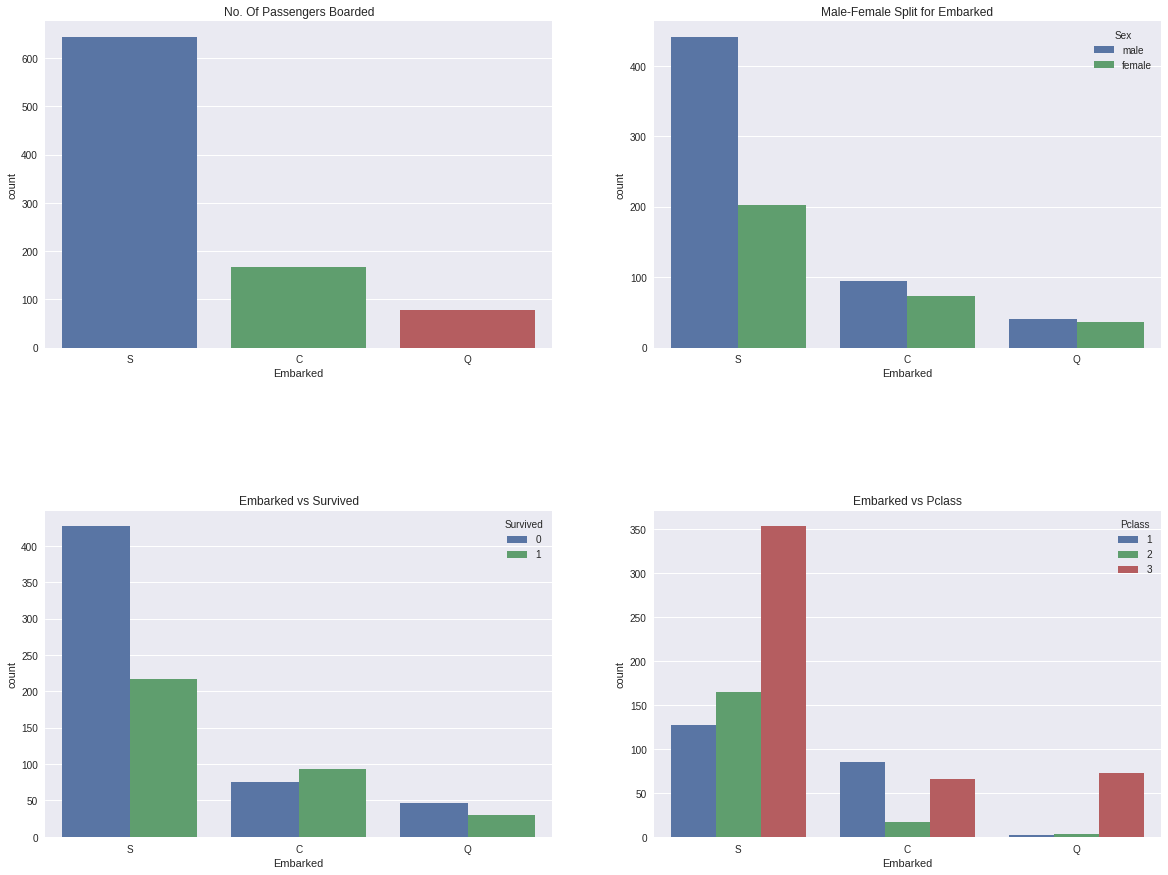

In [24]:
# Embarked와 다양한 column들과의 연관성을 살펴보았다.
# 탑승항구별 탑승자의 수, 남,여 성비, 생존률, Pclass
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot('Embarked', data=data, ax=ax[0, 0])
ax[0, 0].set_title('No. Of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0, 1])
ax[0, 1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1, 0])
ax[1, 0].set_title('Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1, 1])
ax[1, 1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

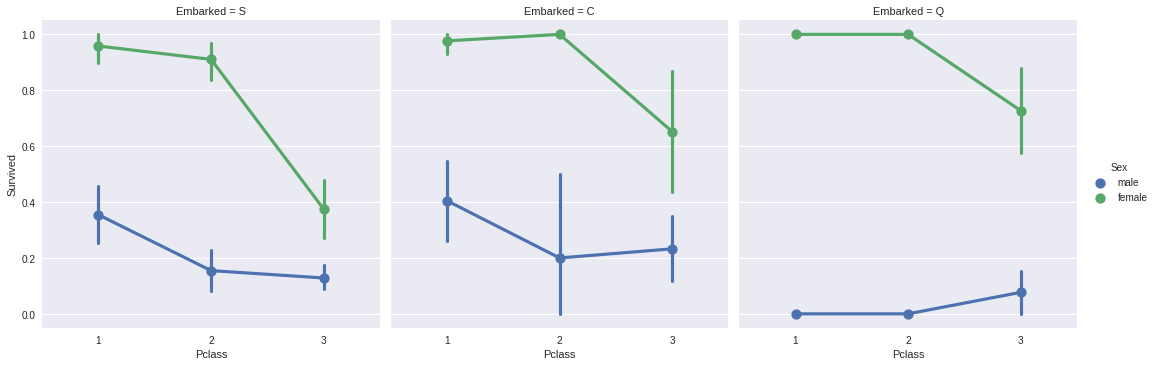

In [25]:
# 탑승항구마다 Pclass별 생존률 확인.
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)
plt.show()

In [26]:
# Embarked는 위에서 봤을 때 빈칸이 2개밖에 없으므로 그냥 가장 인원이 많은 S로 채워주었다.
data['Embarked'].fillna('S', inplace=True)

In [27]:
data.Embarked.isnull().any()

False

In [28]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


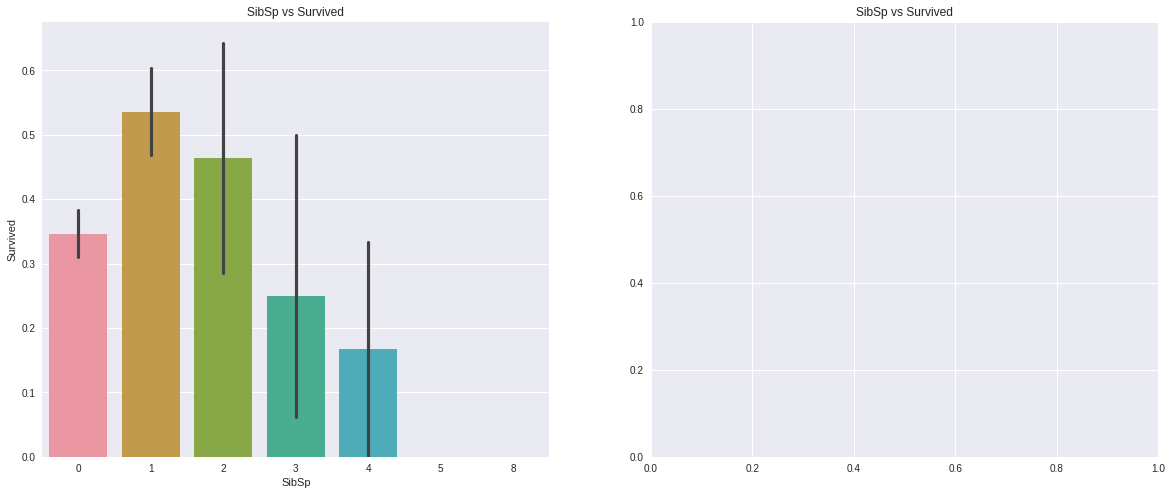

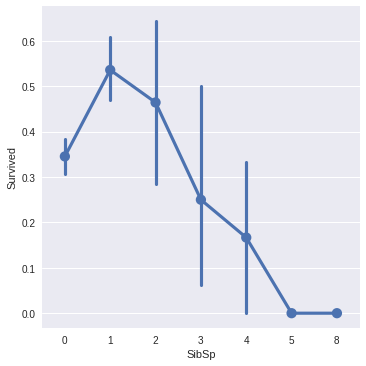

In [29]:
# 형제자매+아내의 수에따른 생존률을 확인해보았다.
# 그래프가 왜 이렇게 나오는지 몰겠...
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot('SibSp', 'Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')

sns.factorplot('SibSp', 'Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.show()

In [30]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


## Parch

In [31]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


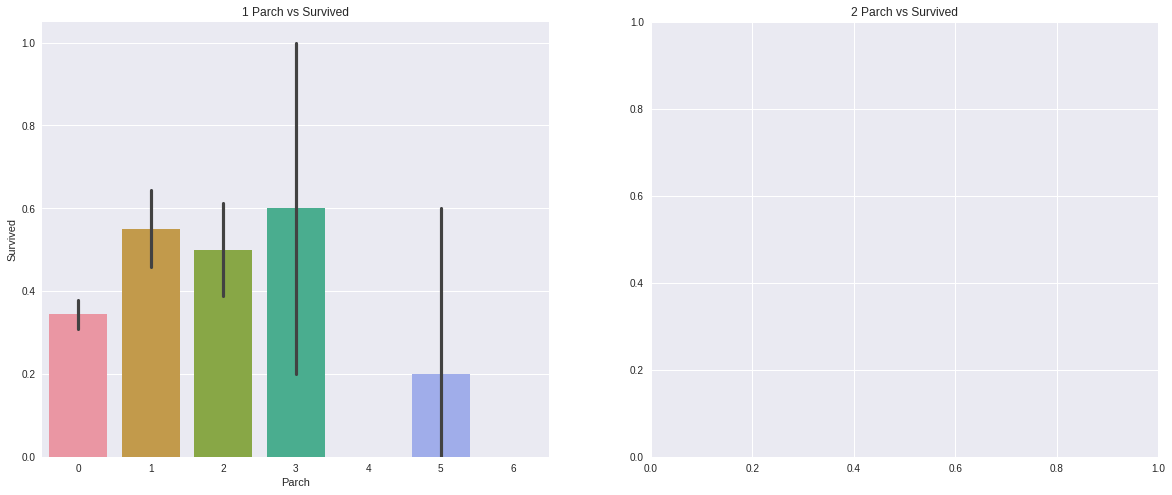

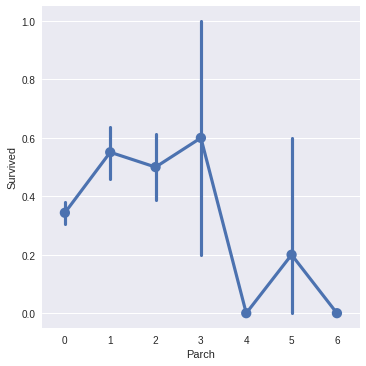

In [32]:
# 부모, 자녀의 수에 따른 생존률 확인.
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot("Parch", "Survived", data=data, ax=ax[0])
ax[0].set_title('1 Parch vs Survived')

sns.factorplot("Parch", "Survived", data=data, ax=ax[1])
ax[1].set_title('2 Parch vs Survived')
plt.show()

In [33]:
print('Highest Fare was:', data['Fare'].max())
print('Lowest Fare was:', data['Fare'].min())
print('Averge Fare was:', data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Averge Fare was: 32.2042079685746


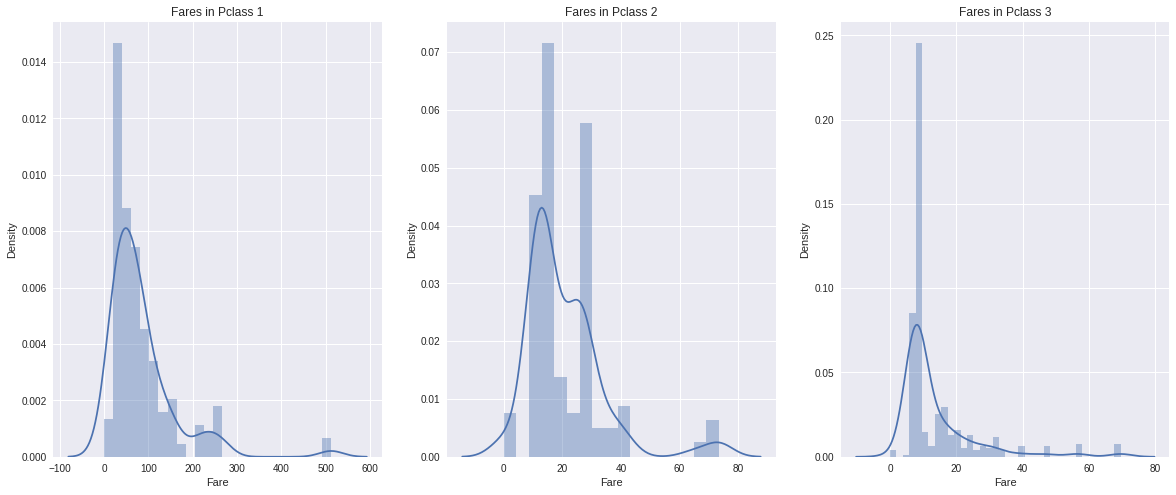

In [34]:
# Pclass마다 요금에 따른 분포를 확인해보았다.
f, ax = plt.subplots(1, 3, figsize=(20, 8))
sns.distplot(data[data['Pclass'] == 1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data[data['Pclass'] == 2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data[data['Pclass'] == 3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

plt.show()

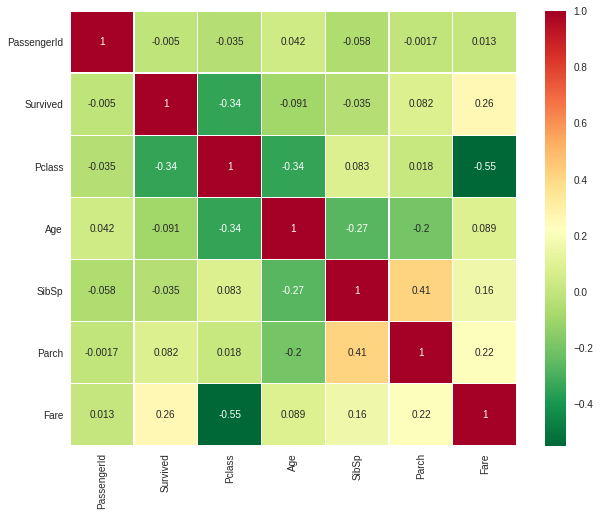

In [35]:
# 각 column간 상관관계를 heatmap으로 표현하면 다음과 같다.
# 데이터가 int형인 것들만 표현가능하다. 즉, str로 되어있는 데이터를 나중에 int로 변환해야함을 뜻한다.
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn_r', linewidths=0.2)
f = plt.gcf()
f.set_size_inches(10, 8)
plt.show()

In [36]:
# 나이 데이터를 모두 사용하기엔 나이대가 너무 다양하기 때문에 그룹을 지어서 5개로 나누어준다.
data['Age_band'] = 0
data.loc[data['Age'] <= 16, 'Age_band'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age_band'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age_band'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age_band'] = 3
data.loc[data['Age'] > 64, 'Age_band'] = 4

In [37]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [38]:
# 어린 사람이 많은 것을 알 수 있다.
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


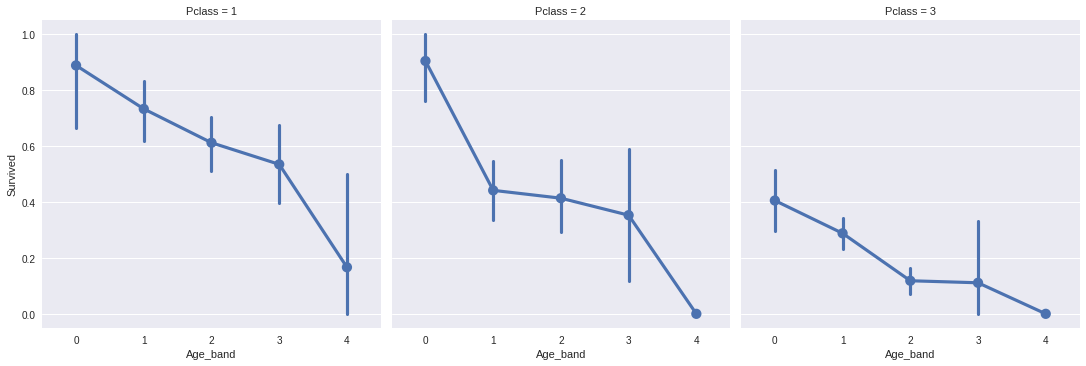

In [39]:
# 모든 클래스에서 나이가 어릴수록 생존률이 높은 것을 알 수 있다.
sns.factorplot('Age_band', 'Survived', col='Pclass', data=data)
plt.show()

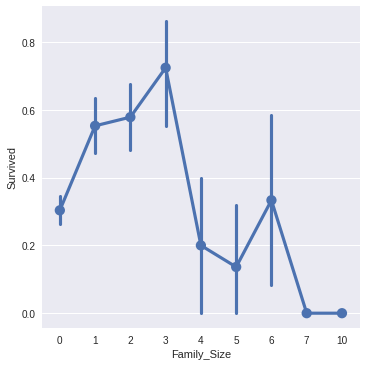

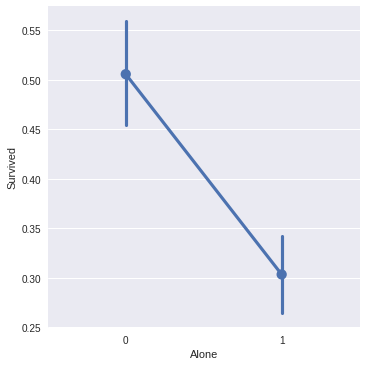

In [40]:
# Family_Size별 생존률 확인
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']

data['Alone'] = 0
data.loc[data.Family_Size == 0, 'Alone'] = 1 # Family_Size가 0이면 alone.

f, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.factorplot('Family_Size', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')

sns.factorplot('Alone', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(1)
plt.show()

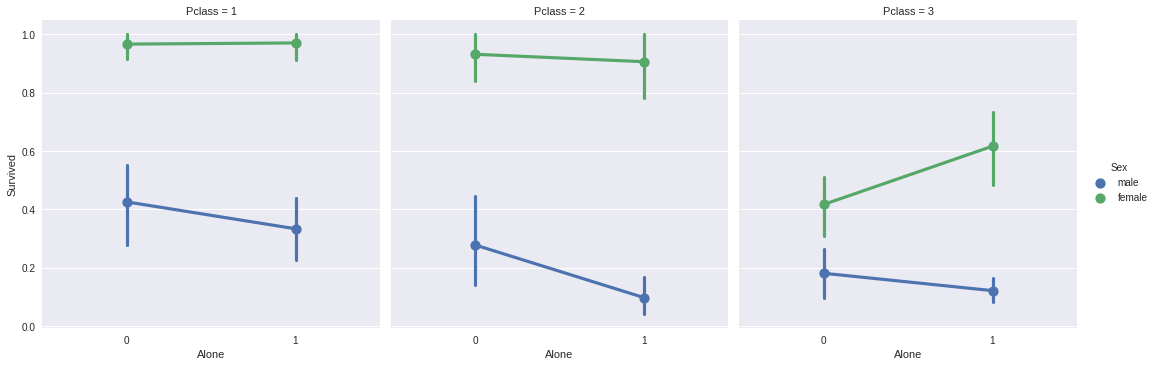

In [41]:
# Pclass별로 혼자인 사람의 성비를 확인한다.
sns.factorplot('Alone', 'Survived', col='Pclass', hue='Sex', data=data)
plt.show()

In [42]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [43]:
# 요금 데이터도 모두 사용하기엔 너무 다양하기 때문에 4개의 그룹으로 모아준다.
data['Fare_cat'] = 0
data.loc[data['Fare'] <= 7.91, 'Fare_cat'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare_cat'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31.0), 'Fare_cat'] = 2
data.loc[(data['Fare'] > 31.0) & (data['Fare'] <= 512.329), 'Fare_cat'] = 3

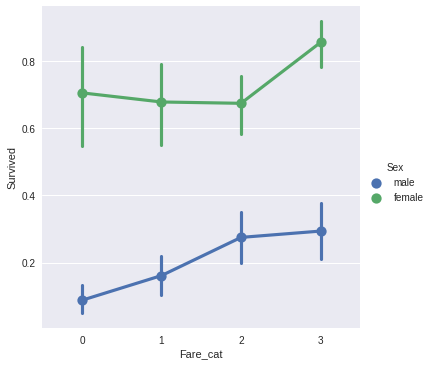

In [44]:
# 성별에 따른 요금별 생존률 확인.
sns.factorplot('Fare_cat', 'Survived', data=data, hue='Sex')
plt.show()

In [45]:
# 위에서 말한 str데이터를 int로 변환해준다.
data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
data['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0, 1, 2, 3, 4], inplace=True)

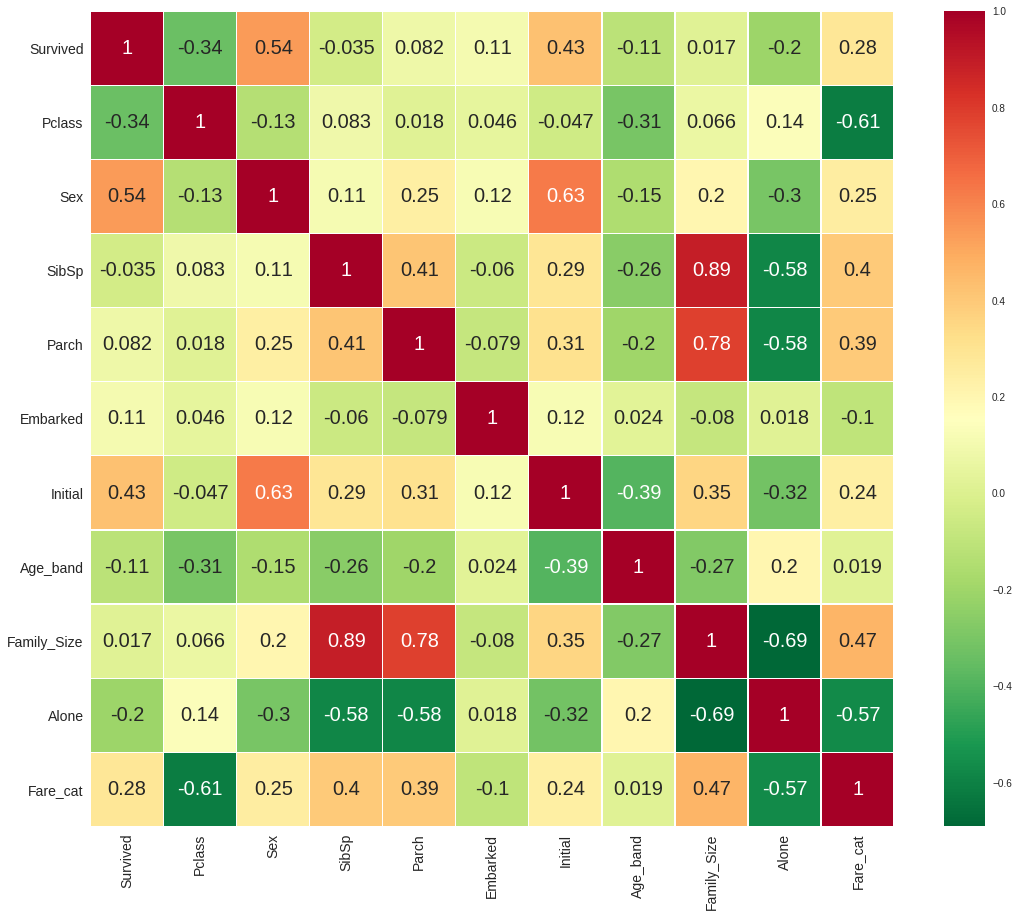

In [46]:
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'], axis=1, inplace=True)
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn_r', linewidths=0.2, annot_kws={'size':20})
f = plt.gcf()
f.set_size_inches(18, 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Predictive Modeling

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split # train, test data split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [48]:
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = data[data.columns[1:]]
Y = data['Survived']

### Radial Support Vector Machines(rbf-SVM)

In [49]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_X, train_Y) # train_X를 train_Y에 근사하도록 학습시킨다.
prediction1 = model.predict(test_X) # test_X에 대해 정답(test_Y)을 예측한다.
print(f'Accuracy of the rbf SVM is {100*metrics.accuracy_score(prediction1, test_Y):.2f}%' ) # 예측값이 실제 정답 test_Y를 얼마나 잘 예측했는지 정확도 측정

Accuracy of the rbf SVM is 83.58%


### Linear Support Vector Machine (linear-SVM)

In [50]:
model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print(f'Accuracy of the linear SVM is {100*metrics.accuracy_score(prediction2, test_Y):.2f}%' )

Accuracy of the linear SVM is 81.72%


### Logistic Regression

In [51]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print(f'Accuracy of the Logistic Regression is {100*metrics.accuracy_score(prediction3, test_Y):.2f}%' )

Accuracy of the Logistic Regression is 82.09%


### Decision Tree

In [52]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print(f'Accuracy of the Decision Tree is {100*metrics.accuracy_score(prediction4, test_Y):.2f}%' )

Accuracy of the Decision Tree is 80.60%


### K-Nearest Neighbors(KNN)

In [53]:
model = KNeighborsClassifier(n_neighbors=9) # 아래 그림을 보면 9일 때가 가장 정확도가 높다.
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print(f'Accuracy of the KNN is {100*metrics.accuracy_score(prediction5, test_Y):.2f}%' )

Accuracy of the KNN is 83.58%


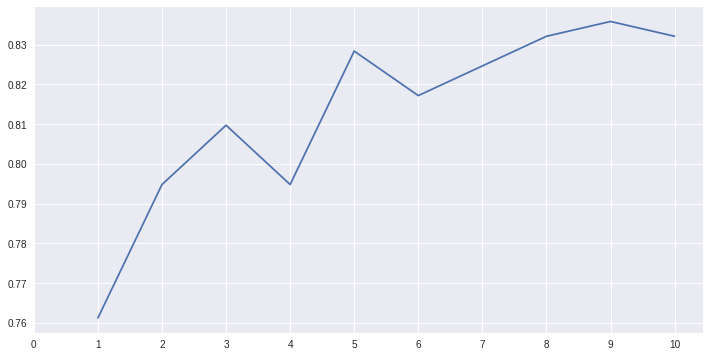

Accuracies for different values of n are: [0.76119403 0.79477612 0.80970149 0.79477612 0.82835821 0.81716418
 0.82462687 0.83208955 0.8358209  0.83208955], with the max value as 0.835820895522388


In [54]:
a_index = list(range(1, 11))
a = pd.Series()
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in list(range(1, 11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
f = plt.gcf()
f.set_size_inches(12, 6)
plt.show()
print(f'Accuracies for different values of n are: {a.values}, with the max value as {a.values.max()}')

### Gaussian Naive Bayes

In [55]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6=model.predict(test_X)
print(f'Accuracy of the Naive Bayes is {100*metrics.accuracy_score(prediction6, test_Y):.2f}%')

Accuracy of the Naive Bayes is 81.34%


### RandomForest

In [56]:
model = RandomForestClassifier()
model.fit(train_X, train_Y)
prediction7=model.predict(test_X)
print(f'Accuracy of the RandomForest is {100*metrics.accuracy_score(prediction7, test_Y):.2f}%')

Accuracy of the RandomForest is 80.97%


## Cross Validation
이제 정확도를 올려보자.

In [57]:
# 모델들의 정확도 평균이 약 80%로 근사한다. 오르긴 오르는 건가..?
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score # score evaluation
from sklearn.model_selection import cross_val_predict # prediction
kfold = KFold(n_splits=10, random_state=22, shuffle=True) # k=10, split the data into 10 equal parts
xyz = []
accuracy = []
std = []
classifiers = ['Linear SVM', 'Radial SVM', 'Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest']
models = [svm.SVC(kernel='linear'), svm.SVC(kernel='rbf'), LogisticRegression(), KNeighborsClassifier(n_neighbors=9), DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
#     cv_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz, 'Std':std}, index=classifiers)
new_models_dataframe2

,CV Mean,Std
Linear SVM,0.785730,0.059693
Radial SVM,0.828377,0.057096
Logistic Regression,0.800300,0.044429
KNN,0.807016,0.041635
Decision Tree,0.811473,0.043037
Naive Bayes,0.793596,0.055424
Random Forest,0.820462,0.047241


<AxesSubplot:>

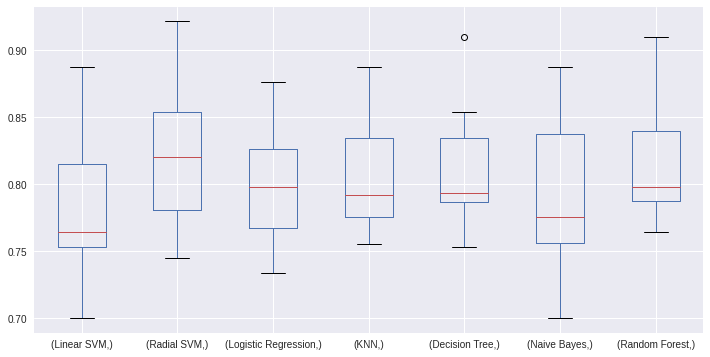

In [58]:
# 교차검증을 하기 전 모델들의 정확도는 아래와 같다.
plt.subplots(figsize=(12, 6))
box = pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

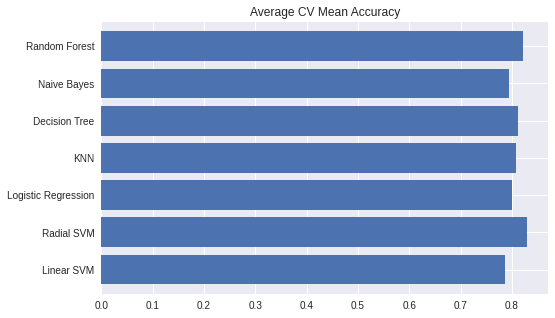

In [59]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
f = plt.gcf()
f.set_size_inches(8, 5)
plt.show()

## Confution matrix

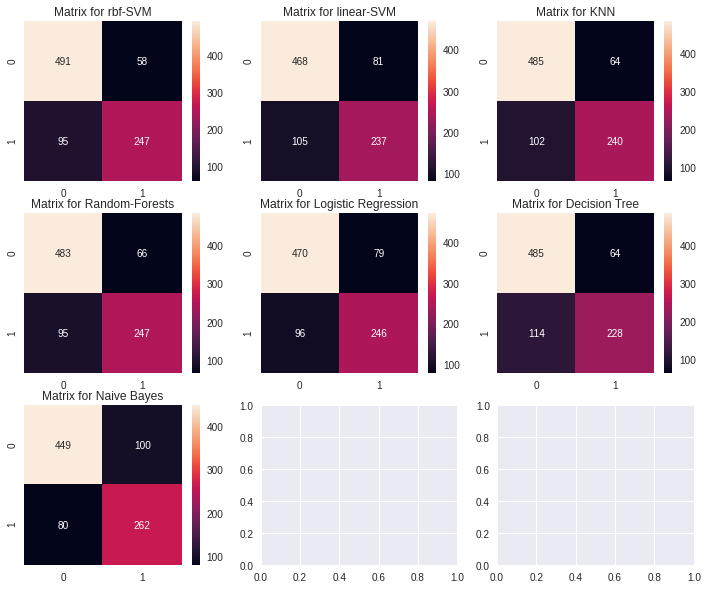

In [60]:
f, ax = plt.subplots(3, 3, figsize=(12, 10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 0], annot=True, fmt='2.0f')
ax[0, 0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 1], annot=True, fmt='2.0f')
ax[0, 1].set_title('Matrix for linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 2], annot=True, fmt='2.0f')
ax[0, 2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 0], annot=True, fmt='2.0f')
ax[1, 0].set_title('Matrix for Random-Forests')

y_pred = cross_val_predict(LogisticRegression(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 1], annot=True, fmt='2.0f')
ax[1, 1].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 2], annot=True, fmt='2.0f')
ax[1, 2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[2, 0], annot=True, fmt='2.0f')
ax[2, 0].set_title('Matrix for Naive Bayes')

plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

#### (x, y)라고 할 때, (0, 0), (1, 1)은 잘 예측한 것.
#### (0, 1)은 살아 있는 사람인데 죽은 것으로 예측(95), (1, 0)은 죽은 사람인데 살아 있다고 예측(58)

### Hyper-Parameters Tuning
SVM

In [61]:
# C, gamma값을 다양하게 주고 rbf, linear SVM에서 가장 정확도가 높은 모델을 찾는다.
from sklearn.model_selection import GridSearchCV
C = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
kernel = ['rbf', 'linear']
hyper = {'kernel': kernel, 'C': C, 'gamma': gamma}
gd = GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
{'C': 0.6, 'gamma': 0.1, 'kernel': 'rbf'}


C=0.6, gamma=0.1, kernel='rbf'일 때가 정확도가 약 82.83%로 가장 높다.

### Random Forest

In [62]:
n_estimators = range(100, 1000, 100)
hyper={'n_estimators': n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.8193208210407382
{'n_estimators': 900}


n_estimators=900일 때, 정확도가 약 81.93%로 가장 높다.

## Ensembling

### Voting Classifier

In [63]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF', svm.SVC(probability=True, kernel='rbf', C=0.6, gamma=0.1)),
                                              ('RFor', RandomForestClassifier(n_estimators=900, random_state=0)),
                                              ('LR', LogisticRegression(C=0.05)),
                                              ('DT', DecisionTreeClassifier(random_state=0)),
                                              ('NB', GaussianNB()),
                                              ('svm', svm.SVC(kernel='linear', probability=True))
                                             ], voting='soft').fit(train_X, train_Y) # train set에 대해 ensemble
print(f'The accuracy for ensembled model is: {100*ensemble_lin_rbf.score(test_X, test_Y):.2f}%') # test set에 대한 정확도
cross = cross_val_score(ensemble_lin_rbf, X, Y, cv=10, scoring='accuracy')
print(f'The cross validated score is {100*cross.mean():.2f}%') # ensembled model에 대해서도 교차 검증을 해준다.

The accuracy for ensembled model is: 82.84%
The cross validated score is 82.49%


### Bagging

KNN

In [64]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print(f'The accuracy for bagged KNN is {100*metrics.accuracy_score(prediction, test_Y):.2f}%')
result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print(f'The cross validated score for bagged KNN is: {100*result.mean()}')

The accuracy for bagged KNN is 83.58%
The cross validated score for bagged KNN is: 81.71660424469414


Decision Tree

In [65]:
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0, n_estimators=100)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print(f'The accuracy for bagged Decision Tree is {100*metrics.accuracy_score(prediction, test_Y):.2f}%')
result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print(f'The cross validated score for bagged Decision Tree is: {100*result.mean()}')

The accuracy for bagged Decision Tree is 83.21%
The cross validated score for bagged Decision Tree is: 81.60174781523096


### Boosting

AdaBoost(Adaptive Boosting)

In [66]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result = cross_val_score(ada, X, Y, cv=10, scoring='accuracy')
print(f'the cross validated score for AdaBoost is: {100*result.mean():.2f}%')

the cross validated score for AdaBoost is: 82.72%


SGD Boosting

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
result = cross_val_score(grad, X, Y, cv=10, scoring='accuracy')
print(f'The cross validated score for Gradient Boost is: {100*result.mean():.2f}%')

The cross validated score for Gradient Boost is: 81.38%


In [68]:
import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
result = cross_val_score(xgboost, X, Y, cv=10, scoring='accuracy')
print(f'The cross validated score for XGBoost is: {100*result.mean():.2f}%')

[13:25:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:25:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:26:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:26:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

이 중 가장 높은 AdaBoost를 hyper-parameters tuning

#### Hyper-Parameter Tuning for AdaBoost

In [69]:
n_estimators = list(range(100, 1100, 100))
learn_rate = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
hyper = {'n_estimators': n_estimators, 'learning_rate': learn_rate}
gd = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8271483271608814
{'learning_rate': 0.05, 'n_estimators': 300}


learning_rate = 0.05, n_estimators = 300일 때 정확도가 가장 높다.

### Confusion Matrix for the Best Model

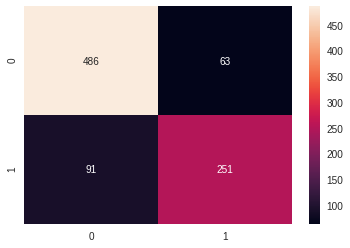

In [72]:
ada = AdaBoostClassifier(n_estimators=300, random_state=0, learning_rate=0.05)
result = cross_val_predict(ada, X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, result), annot=True, fmt='2.0f')
plt.show()

### Feature Importance

NameError: name 'XGBClassifier' is not defined

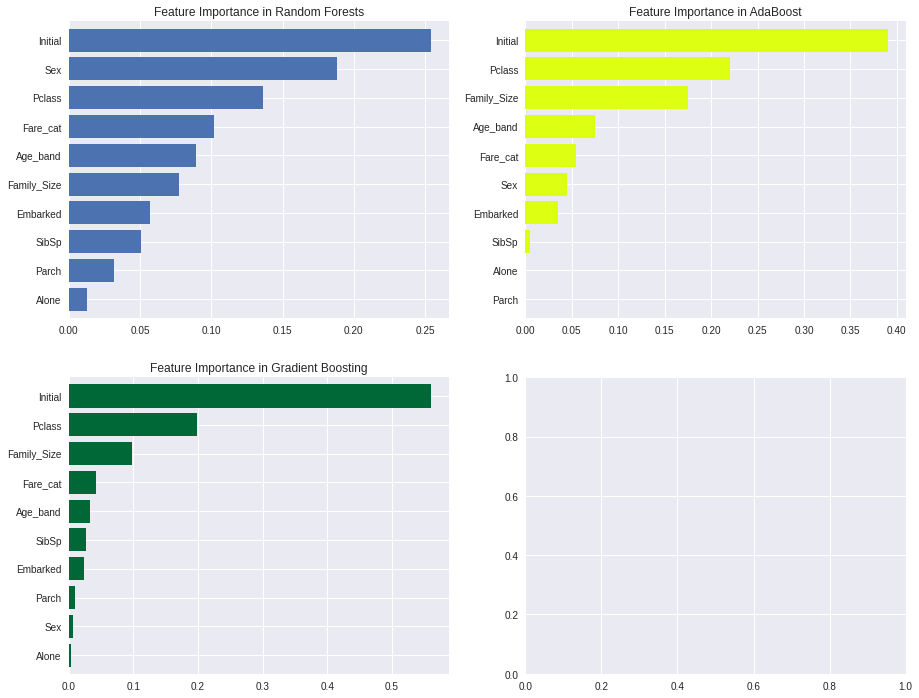

In [75]:
f, ax = plt.subplots(2, 2, figsize=(15, 12))
model = RandomForestClassifier(n_estimators=900, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0, 0])
ax[0, 0].set_title('Feature Importance in Random Forests')

model = AdaBoostClassifier(n_estimators=200, learning_rate=0.05, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0, 1], color='#ddff11')
ax[0, 1].set_title('Feature Importance in AdaBoost')

model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1, 0], cmap='RdYlGn_r')
ax[1, 0].set_title('Feature Importance in Gradient Boosting')

model = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1, 1], color='#FD0F00')
ax[1, 1].set_title('Feature Importance in XGBoost')

plt.show()